In [1]:
import pandas as pd

df = pd.read_csv('Dataset.csv')

# Display basic dataset information
print("Dataset Head:\n", df.head())
print("\nDataset Info:\n")
df.info()


Dataset Head:
    CustomerID  Gender  Age  Annual Income  Spending Score     Profession  \
0           1    Male   19          15000              39     Healthcare   
1           2    Male   21          35000              81       Engineer   
2           3  Female   20          86000               6       Engineer   
3           4  Female   23          59000              77         Lawyer   
4           5  Female   31          38000              40  Entertainment   

   Work Experience  Family Size  
0                1            4  
1                3            3  
2                1            1  
3                0            2  
4                2            6  

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerID       800 non-null    int64 
 1   Gender           800 non-null    object
 2   Age              80

In [3]:
# Dependent Variables (Target Variables)
dependent_vars = ["Gender", "Spending Score", "Annual Income"]  # Based on your request

# Independent Variables (All other features)
independent_vars = df.drop(columns=dependent_vars).columns.tolist()

print("\nIndependent Variables:", independent_vars)
print("Dependent Variables:", dependent_vars)


Independent Variables: ['CustomerID', 'Age', 'Profession', 'Work Experience', 'Family Size']
Dependent Variables: ['Gender', 'Spending Score', 'Annual Income']


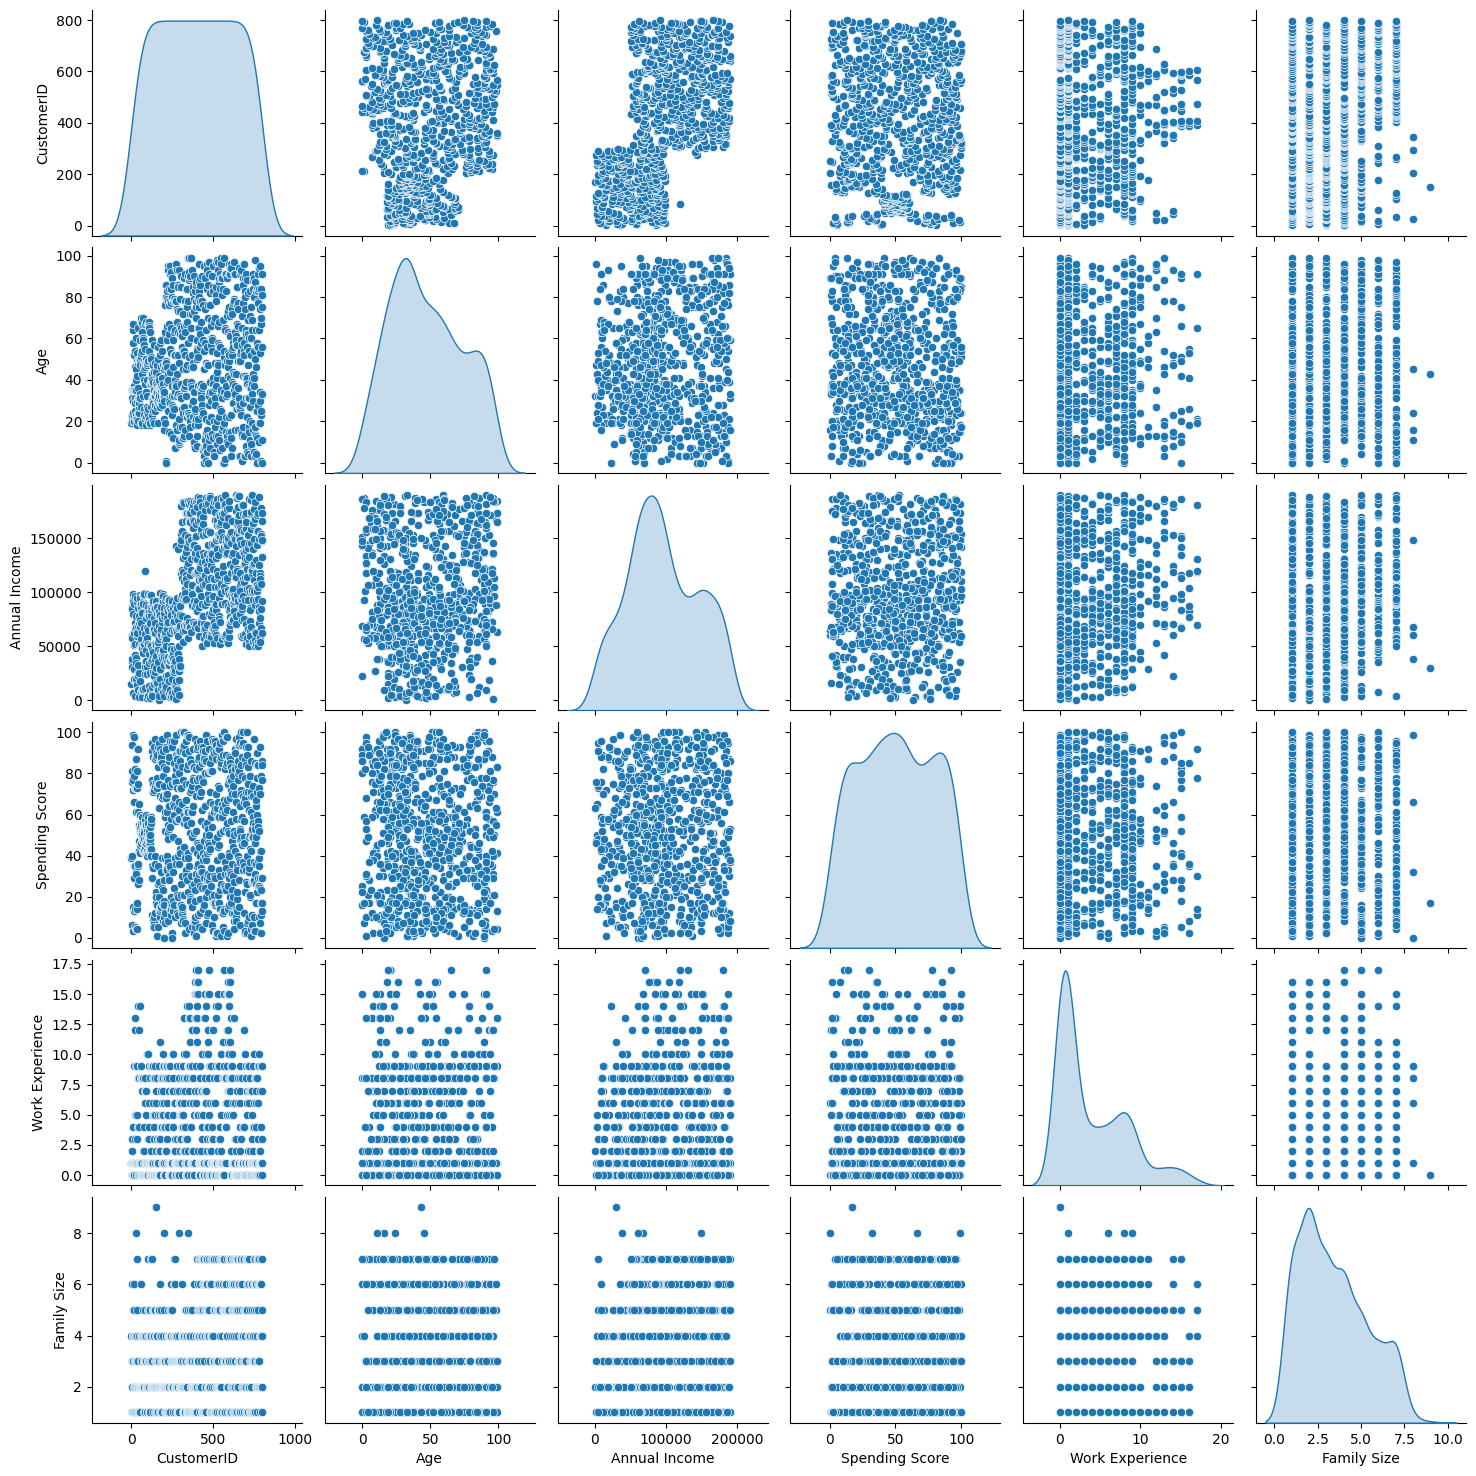

C:\Users\USER\AppData\Local\Temp\ipykernel_33584\601253580.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")


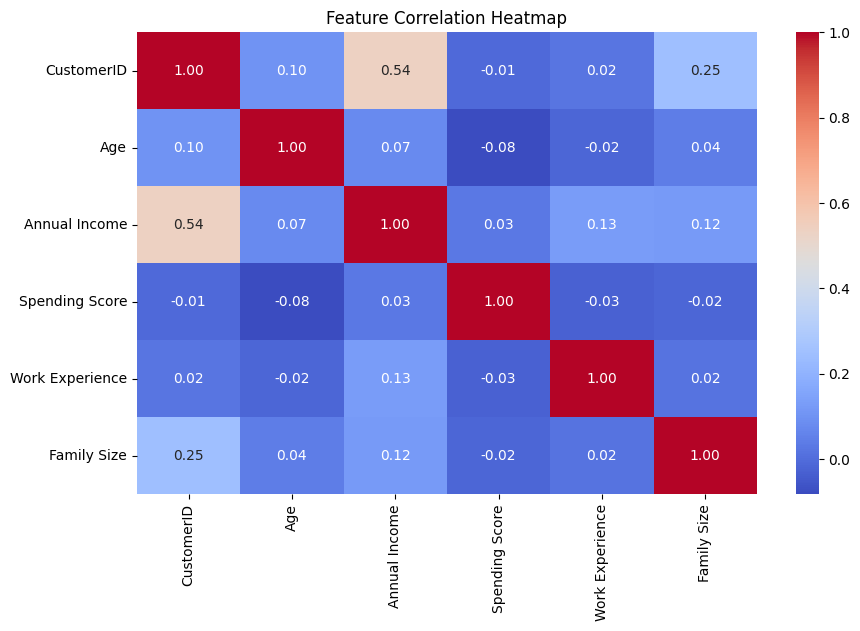

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot for visualization
sns.pairplot(df, diag_kind="kde")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [11]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

# Apply Label Encoding to categorical columns
label_encoders = {}  # Store encoders for future use

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Display updated dataset
print("\nUpdated Dataset (Categorical Variables Encoded):\n", df.head())



Updated Dataset (Categorical Variables Encoded):
    CustomerID  Gender  Age  Annual Income  Spending Score  Profession  \
0           1       1   19          15000              39           5   
1           2       1   21          35000              81           2   
2           3       0   20          86000               6           2   
3           4       0   23          59000              77           7   
4           5       0   31          38000              40           3   

   Work Experience  Family Size  
0                1            4  
1                3            3  
2                1            1  
3                0            2  
4                2            6  


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_income, test_size=0.2, random_state=42)

print("\nTraining Set Shape:", X_train.shape, y_train.shape)
print("Testing Set Shape:", X_test.shape, y_test.shape)



Training Set Shape: (640, 5) (640,)
Testing Set Shape: (160, 5) (160,)


In [ ]:
X = df.drop(columns=dependent_vars)  # Independent variables
y_income = df["Annual Income"]  # Dependent variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_income, test_size=0.2, random_state=42)

# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

print("\nModel Training Completed.")



Model Training Completed.


In [14]:
print("\nModel Intercept:", model.intercept_)



Model Intercept: 47148.064256599726


In [15]:
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
print("\nModel Coefficients:\n", coefficients)



Model Coefficients:
            Feature  Coefficient
0       CustomerID   111.163333
1              Age    50.591182
2       Profession  -659.659504
3  Work Experience  1023.956256
4      Family Size   -20.685268


In [16]:
y_pred = model.predict(X_test)

# Compare predicted vs actual values
comparison = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred})
print("\nActual vs. Predicted Values:\n", comparison.head())



Actual vs. Predicted Values:
    Actual      Predicted
0   51742  137362.299308
1  156880  124245.253693
2   48000   53359.410622
3  171761  110189.669712
4    3000   56070.398385


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")



Model Evaluation Metrics:
Mean Absolute Error (MAE): 33749.68
Mean Squared Error (MSE): 1664960923.84
Root Mean Squared Error (RMSE): 40803.93
R² Score: 0.36
